In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.datasets import mnist

from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [2]:
(train_data,train_label),(test_data,test_label)=mnist.load_data()

print(f'The Train Data shape : {train_data.shape}')
print(f'The Test Data shape : {test_data.shape}')

The Train Data shape : (60000, 28, 28)
The Test Data shape : (10000, 28, 28)


In [3]:
train_data = train_data.reshape((60000,28*28)).astype('float32')/255
test_data = test_data.reshape((10000,28*28)).astype('float32')/255

In [4]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [5]:
train_data,val_data,train_label,val_label=train_test_split(train_data,train_label,test_size=0.25,random_state=13)

In [6]:
model=models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                8208      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 91,898
Trainable params: 91,898
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='Adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [9]:
history=model.fit(train_data , train_label , epochs=100 , batch_size=128,validation_data=[val_data,val_label])

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 33s 730us/step - loss: 0.4632 - acc: 0.8634 - val_loss: 0.2154 - val_acc: 0.9380
Epoch 2/100
45000/45000 [==============================] - 1s 26us/step - loss: 0.1678 - acc: 0.9502 - val_loss: 0.1492 - val_acc: 0.9565
Epoch 3/100
45000/45000 [==============================] - 1s 26us/step - loss: 0.1200 - acc: 0.9634 - val_loss: 0.1463 - val_acc: 0.9558
Epoch 4/100
45000/45000 [==============================] - 1s 28us/step - loss: 0.0973 - acc: 0.9704 - val_loss: 0.1221 - val_acc: 0.9641
Epoch 5/100
45000/45000 [==============================] - 1s 31us/step - loss: 0.0785 - acc: 0.9751 - val_loss: 0.1248 - val_acc: 0.9636
Epoch 6/100
45000/45000 [==============================] - 1s 29us/step - loss: 0.0640 - acc: 0.9798 - val_loss: 0.1139 - val_acc: 0.9665
Epoch 7/100
45000/45000 [==============================] - 1s 26us/step - loss: 0.0535 - acc: 0.9824 - val_loss: 0.1115 

In [10]:
loss,acc=model.evaluate(test_data,test_label)
print(f'The Accuracy on Test Data = {acc}')

10000/10000 [==============================] - 0s 33us/step
The Accuracy on Test Data = 0.9804


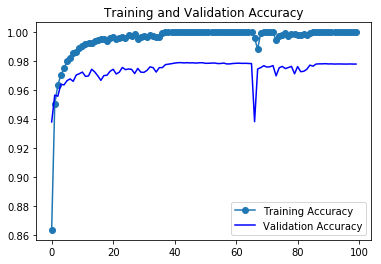

In [12]:
acc = history.history['acc']
loss = history.history['loss']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']

epochs=range(100)

plt.plot(epochs,acc,'o-',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

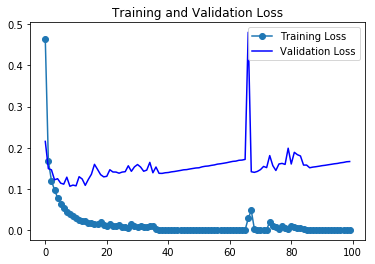

In [13]:
plt.plot(epochs,loss,'o-',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()